# Population Ireland

Import libraries

In [646]:
import pandas as pd
import numpy as np
import os 
import seaborn as  sns
import math
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' 

According to the recent classes of the last week I install plotly to be able to make my visualization graphs more dynamic 

In [647]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [648]:
import plotly.express as px

Import DataBases

In [649]:
PEA=pd.read_csv("Population Estimates Age Group 1950-2023.csv")
AP=pd.read_csv("Annual Population Change 1950-2023.csv")
 #Additional databases (Ireland is a multicultural country so in the same webside I found a statistic about Non-Irish citizens in Ireland 2022, I think it is interesting to see the nationalities that predominate in the country since I am analyzing the population in the country. )
NIC=pd.read_csv("Non-Irish citizens usually resident and present in the State by country of citizenship 2022 EXTRA.csv")

# Population Estimates Age Group 1950-2023

In this base I have the information on the population from 1950 to 2023, first I visualize my base and how my information comes

In [650]:
PEA

,STATISTIC,Year,Sex,UNIT,Under 1 year,0 - 4 years,0 - 14 years,1 - 4 years,5 - 9 years,10 - 14 years,...,50 - 54 years,55 - 59 years,60 - 64 years,65 - 69 years,65 years and over,70 - 74 years,75 - 79 years,80 - 84 years,85 years and over,All ages
0,Population Estimates (Persons in April),1950,Both sexes,Thousand,61.1,NaN,851.2,249.1,278.9,262.1,...,158.4,130.4,121.9,109.3,317.1,100.4,64.0,30.1,13.3,2969.0
1,Population Estimates (Persons in April),1950,Male,Thousand,31.4,NaN,434.6,127.5,142.3,133.4,...,80.6,65.8,61.3,55.2,155.8,49.5,31.4,14.2,5.5,1510.0
2,Population Estimates (Persons in April),1950,Female,Thousand,29.7,NaN,416.6,121.6,136.6,128.7,...,77.8,64.6,60.6,54.1,161.3,50.9,32.6,15.9,7.8,1459.0
3,Population Estimates (Persons in April),1951,Both sexes,Thousand,63.6,312.9,854.8,249.3,281.0,260.9,...,163.0,128.8,122.1,107.5,316.4,100.1,64.6,30.9,13.3,2960.6
4,Population Estimates (Persons in April),1951,Male,Thousand,32.6,160.0,436.4,127.6,143.5,132.7,...,82.9,65.0,61.3,54.1,155.0,49.1,31.6,14.6,5.5,1506.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,Population Estimates (Persons in April),2022,Male,Thousand,29.5,151.6,519.0,122.0,175.9,191.5,...,171.4,153.2,136.0,118.6,368.2,100.2,74.1,43.7,31.6,2562.0
218,Population Estimates (Persons in April),2022,Female,Thousand,28.1,144.2,495.3,116.1,167.7,183.4,...,171.4,156.5,139.8,121.9,413.1,104.5,80.9,53.0,52.8,2622.0
219,Population Estimates (Persons in April),2023,Both sexes,Thousand,55.7,293.8,1011.6,238.1,338.6,379.2,...,354.5,316.3,285.2,244.8,806.3,210.5,162.1,101.8,87.1,5281.6
220,Population Estimates (Persons in April),2023,Male,Thousand,27.4,149.2,516.5,121.8,173.4,193.9,...,176.4,156.1,140.3,120.2,379.9,102.6,77.8,46.1,33.1,2606.2


In [651]:
PEA.shape

(222, 31)

In [652]:
PEA.info

<bound method DataFrame.info of                                    STATISTIC  Year         Sex      UNIT  \
0    Population Estimates (Persons in April)  1950  Both sexes  Thousand   
1    Population Estimates (Persons in April)  1950        Male  Thousand   
2    Population Estimates (Persons in April)  1950      Female  Thousand   
3    Population Estimates (Persons in April)  1951  Both sexes  Thousand   
4    Population Estimates (Persons in April)  1951        Male  Thousand   
..                                       ...   ...         ...       ...   
217  Population Estimates (Persons in April)  2022        Male  Thousand   
218  Population Estimates (Persons in April)  2022      Female  Thousand   
219  Population Estimates (Persons in April)  2023  Both sexes  Thousand   
220  Population Estimates (Persons in April)  2023        Male  Thousand   
221  Population Estimates (Persons in April)  2023      Female  Thousand   

     Under 1 year  0 - 4 years  0 - 14 years  1 - 4 yea

In [653]:
PEA.describe

<bound method NDFrame.describe of                                    STATISTIC  Year         Sex      UNIT  \
0    Population Estimates (Persons in April)  1950  Both sexes  Thousand   
1    Population Estimates (Persons in April)  1950        Male  Thousand   
2    Population Estimates (Persons in April)  1950      Female  Thousand   
3    Population Estimates (Persons in April)  1951  Both sexes  Thousand   
4    Population Estimates (Persons in April)  1951        Male  Thousand   
..                                       ...   ...         ...       ...   
217  Population Estimates (Persons in April)  2022        Male  Thousand   
218  Population Estimates (Persons in April)  2022      Female  Thousand   
219  Population Estimates (Persons in April)  2023  Both sexes  Thousand   
220  Population Estimates (Persons in April)  2023        Male  Thousand   
221  Population Estimates (Persons in April)  2023      Female  Thousand   

     Under 1 year  0 - 4 years  0 - 14 years  1 - 4 y

In [654]:
PEA.describe(include=object) 

,STATISTIC,Sex,UNIT
count,222,222,222
unique,1,3,1
top,Population Estimates (Persons in April),Both sexes,Thousand
freq,222,74,222


In [655]:
PEA.dtypes

STATISTIC             object
Year                   int64
Sex                   object
UNIT                  object
Under 1 year         float64
0 - 4 years          float64
0 - 14 years         float64
1 - 4 years          float64
5 - 9 years          float64
10 - 14 years        float64
15 - 19 years        float64
15 - 24 years        float64
15 years and over    float64
20 - 24 years        float64
25 - 29 years        float64
25 - 44 years        float64
30 - 34 years        float64
35 - 39 years        float64
40 - 44 years        float64
45 - 49 years        float64
45 - 64 years        float64
50 - 54 years        float64
55 - 59 years        float64
60 - 64 years        float64
65 - 69 years        float64
65 years and over    float64
70 - 74 years        float64
75 - 79 years        float64
80 - 84 years        float64
85 years and over    float64
All ages             float64
dtype: object

With previous queries there are garbage columns, which only dirty my information, so I will proceed to eliminate them.

Also detect that there are missing data in a column

In [656]:
PEA = PEA.drop(columns=['STATISTIC','UNIT',])

PEA.head()

,Year,Sex,Under 1 year,0 - 4 years,0 - 14 years,1 - 4 years,5 - 9 years,10 - 14 years,15 - 19 years,15 - 24 years,...,50 - 54 years,55 - 59 years,60 - 64 years,65 - 69 years,65 years and over,70 - 74 years,75 - 79 years,80 - 84 years,85 years and over,All ages
0,1950,Both sexes,61.1,NaN,851.2,249.1,278.9,262.1,244.0,452.6,...,158.4,130.4,121.9,109.3,317.1,100.4,64.0,30.1,13.3,2969.0
1,1950,Male,31.4,NaN,434.6,127.5,142.3,133.4,126.6,234.9,...,80.6,65.8,61.3,55.2,155.8,49.5,31.4,14.2,5.5,1510.0
2,1950,Female,29.7,NaN,416.6,121.6,136.6,128.7,117.4,217.7,...,77.8,64.6,60.6,54.1,161.3,50.9,32.6,15.9,7.8,1459.0
3,1951,Both sexes,63.6,312.9,854.8,249.3,281.0,260.9,241.2,443.4,...,163.0,128.8,122.1,107.5,316.4,100.1,64.6,30.9,13.3,2960.6
4,1951,Male,32.6,160.0,436.4,127.6,143.5,132.7,125.7,231.1,...,82.9,65.0,61.3,54.1,155.0,49.1,31.6,14.6,5.5,1506.6


I already eliminated the columns that were not useful to me and I already saw that the information of my missing data is qualitative, specifically they should be float.

I also already confirmed that the missing information are visible errors

Reviewing the information I see that there are two ways to complete the information;
1st is imputing 
2nd add a column with an operation (Since by reviewing the column you have a column that has the total information if you subtract that of other columns)

# First option: Imputing

I created a copy to be able to work on the second option

In [657]:
PEA_1=PEA.copy()

In [658]:
print(PEA_1['0 - 4 years'].head())

0      NaN
1      NaN
2      NaN
3    312.9
4    160.0
Name: 0 - 4 years, dtype: float64


Continue with the steps in Mark missing values, using isnull and not null

In [659]:
print(PEA_1['0 - 4 years'].isnull().head())

0     True
1     True
2     True
3    False
4    False
Name: 0 - 4 years, dtype: bool


In [660]:
print(PEA_1['0 - 4 years'].notnull().head())

0    False
1    False
2    False
3     True
4     True
Name: 0 - 4 years, dtype: bool


In [661]:
null_filter = PEA_1['0 - 4 years'].isnull()
null_filter is False
print(PEA_1[null_filter]) 

False

     Year         Sex  Under 1 year  0 - 4 years  0 - 14 years  1 - 4 years  \
0    1950  Both sexes          61.1          NaN         851.2        249.1   
1    1950        Male          31.4          NaN         434.6        127.5   
2    1950      Female          29.7          NaN         416.6        121.6   
6    1952  Both sexes          61.9          NaN         859.6        248.4   
7    1952        Male          31.5          NaN         438.8        127.2   
..    ...         ...           ...          ...           ...          ...   
133  1994        Male          25.2          NaN         462.4        108.9   
134  1994      Female          23.6          NaN         436.4        102.6   
135  1995  Both sexes          48.2          NaN         878.0        207.3   
136  1995        Male          24.9          NaN         451.3        106.7   
137  1995      Female          23.3          NaN         426.5        100.6   

     5 - 9 years  10 - 14 years  15 - 19 years  15 

To check if there are any missing values in the data
frame and total

In [662]:
print(PEA_1.isnull().values.any())

True


I verified that 114 data are missing 

In [663]:
print(PEA_1.isnull().sum())

Year                   0
Sex                    0
Under 1 year           0
0 - 4 years          114
0 - 14 years           0
1 - 4 years            0
5 - 9 years            0
10 - 14 years          0
15 - 19 years          0
15 - 24 years          0
15 years and over      0
20 - 24 years          0
25 - 29 years          0
25 - 44 years          0
30 - 34 years          0
35 - 39 years          0
40 - 44 years          0
45 - 49 years          0
45 - 64 years          0
50 - 54 years          0
55 - 59 years          0
60 - 64 years          0
65 - 69 years          0
65 years and over      0
70 - 74 years          0
75 - 79 years          0
80 - 84 years          0
85 years and over      0
All ages               0
dtype: int64


Imputing Missing Values in the Dataset.


I chose to replace NaN with a single constant value since looking at the rows it is seen that there is a contrast between the years and to be able to better see the results when graphing

In [664]:
PEA_1['0 - 4 years'].fillna(0, inplace=True)

print(PEA_1['0 - 4 years'].head()) 

0      0.0
1      0.0
2      0.0
3    312.9
4    160.0
Name: 0 - 4 years, dtype: float64


In [665]:
print(PEA_1.isnull().sum())

Year                 0
Sex                  0
Under 1 year         0
0 - 4 years          0
0 - 14 years         0
1 - 4 years          0
5 - 9 years          0
10 - 14 years        0
15 - 19 years        0
15 - 24 years        0
15 years and over    0
20 - 24 years        0
25 - 29 years        0
25 - 44 years        0
30 - 34 years        0
35 - 39 years        0
40 - 44 years        0
45 - 49 years        0
45 - 64 years        0
50 - 54 years        0
55 - 59 years        0
60 - 64 years        0
65 - 69 years        0
65 years and over    0
70 - 74 years        0
75 - 79 years        0
80 - 84 years        0
85 years and over    0
All ages             0
dtype: int64


I have checked that I no longer have any missing data thanks to the code I have created

# Second option: Math operation


By reviewing the name of the columns I have the information of 'Under 1 year' and '1 - 4 years' so by adding these two columns I can get the information from the missing column ("0 - 4 years")with the exact data I require.

For that I will first make a comparison to see if the theory is correct and the data that I already have in the column is the result of the sum of those 2 data.

In [666]:
PEA['0 - 4'] = PEA['Under 1 year']+PEA['1 - 4 years']
PEA

,Year,Sex,Under 1 year,0 - 4 years,0 - 14 years,1 - 4 years,5 - 9 years,10 - 14 years,15 - 19 years,15 - 24 years,...,55 - 59 years,60 - 64 years,65 - 69 years,65 years and over,70 - 74 years,75 - 79 years,80 - 84 years,85 years and over,All ages,0 - 4
0,1950,Both sexes,61.1,NaN,851.2,249.1,278.9,262.1,244.0,452.6,...,130.4,121.9,109.3,317.1,100.4,64.0,30.1,13.3,2969.0,310.2
1,1950,Male,31.4,NaN,434.6,127.5,142.3,133.4,126.6,234.9,...,65.8,61.3,55.2,155.8,49.5,31.4,14.2,5.5,1510.0,158.9
2,1950,Female,29.7,NaN,416.6,121.6,136.6,128.7,117.4,217.7,...,64.6,60.6,54.1,161.3,50.9,32.6,15.9,7.8,1459.0,151.3
3,1951,Both sexes,63.6,312.9,854.8,249.3,281.0,260.9,241.2,443.4,...,128.8,122.1,107.5,316.4,100.1,64.6,30.9,13.3,2960.6,312.9
4,1951,Male,32.6,160.0,436.4,127.6,143.5,132.7,125.7,231.1,...,65.0,61.3,54.1,155.0,49.1,31.6,14.6,5.5,1506.6,160.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2022,Male,29.5,151.6,519.0,122.0,175.9,191.5,172.6,330.6,...,153.2,136.0,118.6,368.2,100.2,74.1,43.7,31.6,2562.0,151.5
218,2022,Female,28.1,144.2,495.3,116.1,167.7,183.4,165.1,319.1,...,156.5,139.8,121.9,413.1,104.5,80.9,53.0,52.8,2622.0,144.2
219,2023,Both sexes,55.7,293.8,1011.6,238.1,338.6,379.2,349.5,667.2,...,316.3,285.2,244.8,806.3,210.5,162.1,101.8,87.1,5281.6,293.8
220,2023,Male,27.4,149.2,516.5,121.8,173.4,193.9,178.7,340.0,...,156.1,140.3,120.2,379.9,102.6,77.8,46.1,33.1,2606.2,149.2


In [667]:
PEA['comparison'] = PEA['0 - 4 years']==PEA['0 - 4']
PEA

,Year,Sex,Under 1 year,0 - 4 years,0 - 14 years,1 - 4 years,5 - 9 years,10 - 14 years,15 - 19 years,15 - 24 years,...,60 - 64 years,65 - 69 years,65 years and over,70 - 74 years,75 - 79 years,80 - 84 years,85 years and over,All ages,0 - 4,comparison
0,1950,Both sexes,61.1,NaN,851.2,249.1,278.9,262.1,244.0,452.6,...,121.9,109.3,317.1,100.4,64.0,30.1,13.3,2969.0,310.2,False
1,1950,Male,31.4,NaN,434.6,127.5,142.3,133.4,126.6,234.9,...,61.3,55.2,155.8,49.5,31.4,14.2,5.5,1510.0,158.9,False
2,1950,Female,29.7,NaN,416.6,121.6,136.6,128.7,117.4,217.7,...,60.6,54.1,161.3,50.9,32.6,15.9,7.8,1459.0,151.3,False
3,1951,Both sexes,63.6,312.9,854.8,249.3,281.0,260.9,241.2,443.4,...,122.1,107.5,316.4,100.1,64.6,30.9,13.3,2960.6,312.9,False
4,1951,Male,32.6,160.0,436.4,127.6,143.5,132.7,125.7,231.1,...,61.3,54.1,155.0,49.1,31.6,14.6,5.5,1506.6,160.2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2022,Male,29.5,151.6,519.0,122.0,175.9,191.5,172.6,330.6,...,136.0,118.6,368.2,100.2,74.1,43.7,31.6,2562.0,151.5,False
218,2022,Female,28.1,144.2,495.3,116.1,167.7,183.4,165.1,319.1,...,139.8,121.9,413.1,104.5,80.9,53.0,52.8,2622.0,144.2,True
219,2023,Both sexes,55.7,293.8,1011.6,238.1,338.6,379.2,349.5,667.2,...,285.2,244.8,806.3,210.5,162.1,101.8,87.1,5281.6,293.8,True
220,2023,Male,27.4,149.2,516.5,121.8,173.4,193.9,178.7,340.0,...,140.3,120.2,379.9,102.6,77.8,46.1,33.1,2606.2,149.2,True


In [668]:
PEA['comparison'].value_counts().get(True, 0)

61

In [669]:
(222-114)

108

I see that only 61 of the 108 values I have in that column match, so I will continue adding another column to corroborate that the difference is less than 1, if it is less than 1 I will confirm that my theory is correct and I will opt for option 2 to leave my values in the base, since they are more accurate values.

In [670]:
PEA['comparison#'] = PEA['0 - 4 years']-PEA['0 - 4']
PEA

,Year,Sex,Under 1 year,0 - 4 years,0 - 14 years,1 - 4 years,5 - 9 years,10 - 14 years,15 - 19 years,15 - 24 years,...,65 - 69 years,65 years and over,70 - 74 years,75 - 79 years,80 - 84 years,85 years and over,All ages,0 - 4,comparison,comparison#
0,1950,Both sexes,61.1,NaN,851.2,249.1,278.9,262.1,244.0,452.6,...,109.3,317.1,100.4,64.0,30.1,13.3,2969.0,310.2,False,NaN
1,1950,Male,31.4,NaN,434.6,127.5,142.3,133.4,126.6,234.9,...,55.2,155.8,49.5,31.4,14.2,5.5,1510.0,158.9,False,NaN
2,1950,Female,29.7,NaN,416.6,121.6,136.6,128.7,117.4,217.7,...,54.1,161.3,50.9,32.6,15.9,7.8,1459.0,151.3,False,NaN
3,1951,Both sexes,63.6,312.9,854.8,249.3,281.0,260.9,241.2,443.4,...,107.5,316.4,100.1,64.6,30.9,13.3,2960.6,312.9,False,-5.684342e-14
4,1951,Male,32.6,160.0,436.4,127.6,143.5,132.7,125.7,231.1,...,54.1,155.0,49.1,31.6,14.6,5.5,1506.6,160.2,False,-2.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2022,Male,29.5,151.6,519.0,122.0,175.9,191.5,172.6,330.6,...,118.6,368.2,100.2,74.1,43.7,31.6,2562.0,151.5,False,1.000000e-01
218,2022,Female,28.1,144.2,495.3,116.1,167.7,183.4,165.1,319.1,...,121.9,413.1,104.5,80.9,53.0,52.8,2622.0,144.2,True,0.000000e+00
219,2023,Both sexes,55.7,293.8,1011.6,238.1,338.6,379.2,349.5,667.2,...,244.8,806.3,210.5,162.1,101.8,87.1,5281.6,293.8,True,0.000000e+00
220,2023,Male,27.4,149.2,516.5,121.8,173.4,193.9,178.7,340.0,...,120.2,379.9,102.6,77.8,46.1,33.1,2606.2,149.2,True,0.000000e+00


In [671]:
PEA['>1'] = np.where(PEA['comparison#']>1,1,0)
PEA

,Year,Sex,Under 1 year,0 - 4 years,0 - 14 years,1 - 4 years,5 - 9 years,10 - 14 years,15 - 19 years,15 - 24 years,...,65 years and over,70 - 74 years,75 - 79 years,80 - 84 years,85 years and over,All ages,0 - 4,comparison,comparison#,>1
0,1950,Both sexes,61.1,NaN,851.2,249.1,278.9,262.1,244.0,452.6,...,317.1,100.4,64.0,30.1,13.3,2969.0,310.2,False,NaN,0
1,1950,Male,31.4,NaN,434.6,127.5,142.3,133.4,126.6,234.9,...,155.8,49.5,31.4,14.2,5.5,1510.0,158.9,False,NaN,0
2,1950,Female,29.7,NaN,416.6,121.6,136.6,128.7,117.4,217.7,...,161.3,50.9,32.6,15.9,7.8,1459.0,151.3,False,NaN,0
3,1951,Both sexes,63.6,312.9,854.8,249.3,281.0,260.9,241.2,443.4,...,316.4,100.1,64.6,30.9,13.3,2960.6,312.9,False,-5.684342e-14,0
4,1951,Male,32.6,160.0,436.4,127.6,143.5,132.7,125.7,231.1,...,155.0,49.1,31.6,14.6,5.5,1506.6,160.2,False,-2.000000e-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2022,Male,29.5,151.6,519.0,122.0,175.9,191.5,172.6,330.6,...,368.2,100.2,74.1,43.7,31.6,2562.0,151.5,False,1.000000e-01,0
218,2022,Female,28.1,144.2,495.3,116.1,167.7,183.4,165.1,319.1,...,413.1,104.5,80.9,53.0,52.8,2622.0,144.2,True,0.000000e+00,0
219,2023,Both sexes,55.7,293.8,1011.6,238.1,338.6,379.2,349.5,667.2,...,806.3,210.5,162.1,101.8,87.1,5281.6,293.8,True,0.000000e+00,0
220,2023,Male,27.4,149.2,516.5,121.8,173.4,193.9,178.7,340.0,...,379.9,102.6,77.8,46.1,33.1,2606.2,149.2,True,0.000000e+00,0


In [672]:
PEA['>1'].value_counts()

0    222
Name: >1, dtype: int64

After reviewing these checks, the result is that of the 108 data that I have in the column, 61 correspond to the theory of the sum of the 2 columns and those that have a difference are by figures less than one, so the theory is correct and can be used to fill in missing data

I will continue with the elimination of the columns that were added for the checks and the column with missing data, leaving the new one with the total data

In [673]:
PEA= PEA.drop(columns=['0 - 4 years','comparison','comparison#','>1',])

PEA.head()


,Year,Sex,Under 1 year,0 - 14 years,1 - 4 years,5 - 9 years,10 - 14 years,15 - 19 years,15 - 24 years,15 years and over,...,55 - 59 years,60 - 64 years,65 - 69 years,65 years and over,70 - 74 years,75 - 79 years,80 - 84 years,85 years and over,All ages,0 - 4
0,1950,Both sexes,61.1,851.2,249.1,278.9,262.1,244.0,452.6,2117.8,...,130.4,121.9,109.3,317.1,100.4,64.0,30.1,13.3,2969.0,310.2
1,1950,Male,31.4,434.6,127.5,142.3,133.4,126.6,234.9,1075.4,...,65.8,61.3,55.2,155.8,49.5,31.4,14.2,5.5,1510.0,158.9
2,1950,Female,29.7,416.6,121.6,136.6,128.7,117.4,217.7,1042.4,...,64.6,60.6,54.1,161.3,50.9,32.6,15.9,7.8,1459.0,151.3
3,1951,Both sexes,63.6,854.8,249.3,281.0,260.9,241.2,443.4,2105.8,...,128.8,122.1,107.5,316.4,100.1,64.6,30.9,13.3,2960.6,312.9
4,1951,Male,32.6,436.4,127.6,143.5,132.7,125.7,231.1,1070.2,...,65.0,61.3,54.1,155.0,49.1,31.6,14.6,5.5,1506.6,160.2


In my first analysis I would like to look at the population over the years so I will only work with totals and both sexes.

In [674]:
PEA_t = PEA[['Year','Sex','All ages']]
PEA_t

,Year,Sex,All ages
0,1950,Both sexes,2969.0
1,1950,Male,1510.0
2,1950,Female,1459.0
3,1951,Both sexes,2960.6
4,1951,Male,1506.6
...,...,...,...
217,2022,Male,2562.0
218,2022,Female,2622.0
219,2023,Both sexes,5281.6
220,2023,Male,2606.2


In [675]:
Population= PEA_t[PEA_t["Sex"]=="Both sexes"]
Population

,Year,Sex,All ages
0,1950,Both sexes,2969.0
3,1951,Both sexes,2960.6
6,1952,Both sexes,2952.9
9,1953,Both sexes,2949.0
12,1954,Both sexes,2941.2
...,...,...,...
207,2019,Both sexes,4958.5
210,2020,Both sexes,5029.9
213,2021,Both sexes,5074.7
216,2022,Both sexes,5184.0


In [676]:
Population=Population.rename (columns= {'All ages':'Population'})
Population

,Year,Sex,Population
0,1950,Both sexes,2969.0
3,1951,Both sexes,2960.6
6,1952,Both sexes,2952.9
9,1953,Both sexes,2949.0
12,1954,Both sexes,2941.2
...,...,...,...
207,2019,Both sexes,4958.5
210,2020,Both sexes,5029.9
213,2021,Both sexes,5074.7
216,2022,Both sexes,5184.0


In [677]:
#My first plot is with Matplotlib in order to compare the results with other libraries.
#Modify the number to 74 which is the number of years I have in my base. 

(array([5., 4., 4., 5., 4., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
        1., 1., 1., 3., 6., 2., 2., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
        1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
        1., 2., 2., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
        0., 0., 0., 1., 0., 1.]),
 array([2818.3       , 2851.58783784, 2884.87567568, 2918.16351351,
        2951.45135135, 2984.73918919, 3018.02702703, 3051.31486486,
        3084.6027027 , 3117.89054054, 3151.17837838, 3184.46621622,
        3217.75405405, 3251.04189189, 3284.32972973, 3317.61756757,
        3350.90540541, 3384.19324324, 3417.48108108, 3450.76891892,
        3484.05675676, 3517.34459459, 3550.63243243, 3583.92027027,
        3617.20810811, 3650.49594595, 3683.78378378, 3717.07162162,
        3750.35945946, 3783.6472973 , 3816.93513514, 3850.22297297,
        3883.51081081, 3916.79864865, 3950.08648649, 3983.37432432,
        4016.66216216, 4049.95      , 4083.2378378

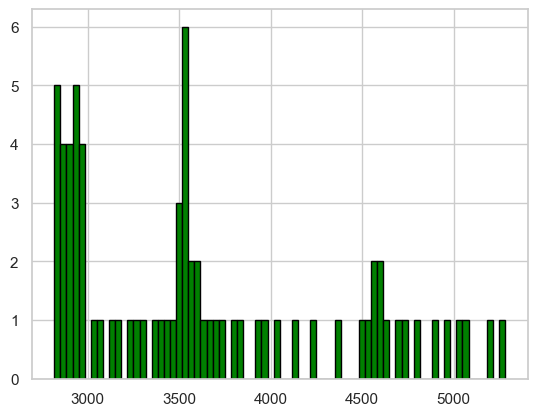

In [678]:
plt.hist(Population['Population'],74, color='green', ec='black')

In [679]:
#Pandas
#Modify the bins to 74 which is the number of years I have in my base. 

array([[<Axes: title={'center': 'Population'}>]], dtype=object)

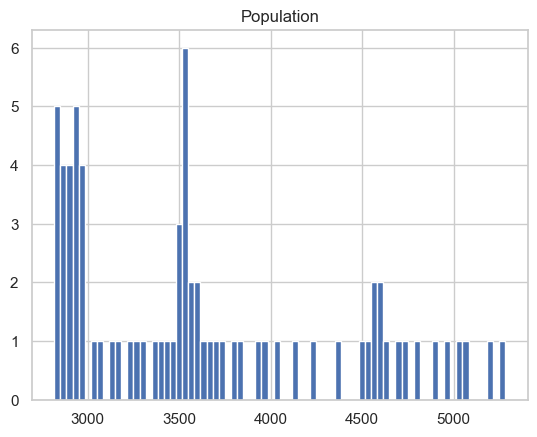

In [680]:
Population.hist(column='Population', bins=74) 

In [681]:
#Seaborn
#I had to cancel kenel density which gives the code to be able to see all the data. 

<Axes: xlabel='Population'>

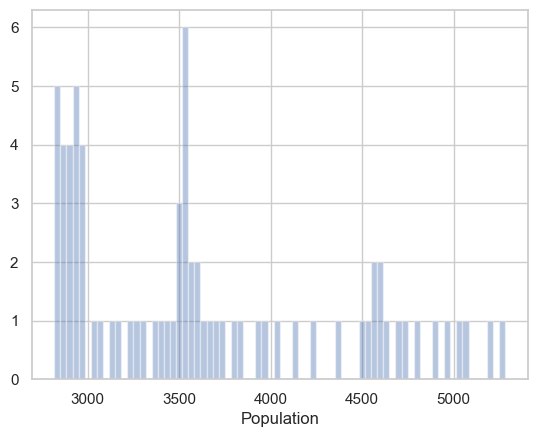

In [682]:
sns.distplot(Population.Population,kde=False, bins=74) 

<Axes: xlabel='Population'>

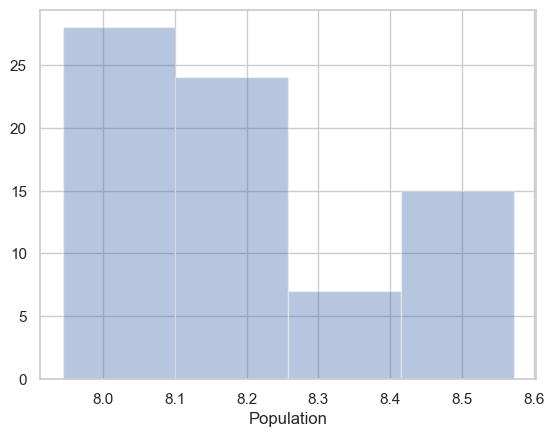

In [683]:
sns.distplot(np.log(Population.Population), kde=False) 

In [684]:
sns.catplot("Year", data=Population, aspect=1.5, kind="Population", color="b") 

TypeError: catplot() got multiple values for argument 'data'

In [ ]:

#I had

I consider that dot plots are the best graph to appreciate the change in population over the years, so I will plot with plot, scatterplot .

In [ ]:
#Matlplotlab

In [ ]:
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population over the years')
plt.plot(Population['Year'], Population['Population'], marker='o', linestyle='-')

In [ ]:
x = Population['Year']
y = Population['Population']

In [ ]:
plt.xlabel('Year',fontsize=10)
plt.ylabel('Population',fontsize=10)
plt.xticks(rotation=80)
plt.scatter(x,y)


Finally the bar graph is not suitable to represent the change in the population over the years since it is more for visualizing quantities but I would like to see the results

In [ ]:
plt.xlabel('Year',fontsize=10)
plt.ylabel('Population',fontsize=10)
plt.xticks(rotation=80)

plt.bar(x,y)

I confirm that the bar graph does not correspond to this analysis

I will save the information on the 2022 population for the analysis of my 3 csv

In [ ]:
Population

In [ ]:
Population.iloc[72:73,0:3]

In [ ]:
Population_2022=5184

Checked the max population in Ireland

In [ ]:
Population['Population'].max()

To continue with the data cleaning, I will group by each 10 years, to reduce the number of columns and to be able to better manipulate the information since in several columns the age is repeated. 

In [ ]:
PEA['0-9'] = PEA['0 - 4']+PEA['5 - 9 years']
PEA['10-19'] = PEA['10 - 14 years']+PEA['15 - 19 years']
PEA['20-29'] = PEA['20 - 24 years']+PEA['25 - 29 years']
PEA['30-39'] = PEA['30 - 34 years']+PEA['35 - 39 years']
PEA['40-49'] = PEA['40 - 44 years']+PEA['45 - 49 years']
PEA['50-59'] = PEA['50 - 54 years']+PEA['55 - 59 years']
PEA['60-69'] = PEA['60 - 64 years']+PEA['65 - 69 years']
PEA['70-79'] = PEA['70 - 74 years']+PEA['75 - 79 years']
PEA['80+'] = PEA['80 - 84 years']+PEA['85 years and over']

In [ ]:
PEA.head()

In [ ]:
PEA_ages= PEA[['Year','Sex','0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80+']]
PEA_ages

In [ ]:
PEA_2017=PEA_ages [PEA_ages["Year"].astype("int64")>=2003]
PEA_2017

In [ ]:
PEA_ML= PEA_2017[(PEA_2017["Sex"]=="Male")|(PEA_2017["Sex"]=="Female")]
PEA_ML

Once my information is grouped I would like to see 3 graphs: kids 0-9 (youngest population; adults by year (18 years, group of 10-19) and oldest population (80 +)

In [ ]:
#kids 0-9 (youngest population)

In [ ]:
ax = sns.barplot(x="Year", y="0-9", hue='Sex', data=PEA_ML)
plt.xticks(rotation=70)

In [ ]:
#Adults by year (18 years, group of 10-19)

In [ ]:
ax = sns.barplot(x="Year", y="10-19", hue='Sex', data=PEA_ML)
plt.xticks(rotation=70)

In [ ]:
#Oldest population (80 +)

In [ ]:
ax = sns.barplot(x="Year", y="80+", hue='Sex', data=PEA_ML)
plt.xticks(rotation=70)

Finally with a standing graph I would like to see the current population of 2023 by age

In [685]:
PEA_2023= PEA_ages[PEA_ages["Sex"]=="Both sexes"]

In [686]:
PEA2023=PEA_2023[PEA_2023["Year"].astype("int64")==2023]

In [687]:
PEA_2023= PEA2023.drop(columns=['Year','Sex',])
PEA_2023.head()

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+
219,632.4,728.7,626.3,721.5,810.4,670.8,530.0,372.6,188.9


In [688]:
PEA_2023=PEA_2023.melt(var_name="Age",value_name="Population")
PEA_2023

,Age,Population
0,0-9,632.4
1,10-19,728.7
2,20-29,626.3
3,30-39,721.5
4,40-49,810.4
5,50-59,670.8
6,60-69,530.0
7,70-79,372.6
8,80+,188.9


In [689]:
#Matplotlib

([<matplotlib.patches.Wedge at 0x1617e4851d0>,
 [Text(-0.40409005618923566, 1.0230890608783678, '0-9'),
  Text(-1.0194675755788283, 0.4131414556098507, '10-19'),
  Text(-1.0039699371284998, -0.44949345417057684, '20-29'),
  Text(-0.3752723877636399, -1.0340070768530438, '30-39'),
  Text(0.5871493986799886, -0.9301911543493241, '40-49'),
  Text(1.0911832374739403, -0.13899331730659034, '50-59'),
  Text(0.9155243104146387, 0.6097665430636552, '60-69'),
  Text(0.4748452611521877, 0.9922308088148195, '70-79'),
  Text(0.12333736495215326, 1.0930635363082328, '80+')],
 [Text(-0.22041275792140125, 0.5580485786609278, '12.0%'),
  Text(-0.5560732230429972, 0.22534988487810037, '13.8%'),
  Text(-0.5476199657064543, -0.2451782477294055, '11.9%'),
  Text(-0.20469402968925812, -0.5640038601016601, '13.7%'),
  Text(0.32026330837090283, -0.5073769932814495, '15.3%'),
  Text(0.5951908568039674, -0.07581453671268563, '12.7%'),
  Text(0.49937689658980283, 0.33259993258017556, '10.0%'),
  Text(0.25900650

Text(0.5, 1.0, 'Population 2023')

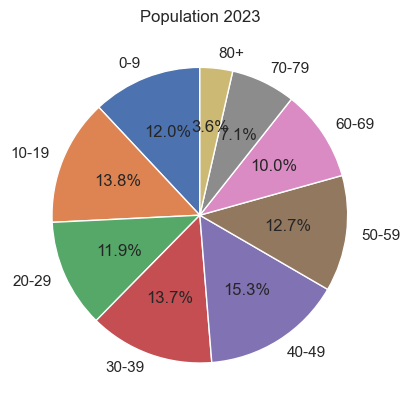

In [690]:
plt.pie(PEA_2023['Population'], labels=PEA_2023['Age'], autopct='%1.1f%%', startangle=90)

plt.title('Population 2023')

In [691]:
#Since I have little data, I will create the lists so that I can plot it as if I did not have the dataframe.

([<matplotlib.patches.Wedge at 0x1610005e4d0>,
 [Text(0.9373765373044073, 0.5756085712627979, '0-9'),
  Text(0.2507304238751376, 1.1735136362835303, '10-19'),
  Text(-0.6170021886101682, 0.9106636586853911, '20-29'),
  Text(-1.181960238783536, 0.2072920498590499, '30-39'),
  Text(-0.8141020374875757, -0.7397552788311674, '40-49'),
  Text(0.05738212820469358, -1.1986272528866933, '50-59'),
  Text(0.7594819472498151, -0.7957305899622241, '60-69'),
  Text(1.1559410264413783, -0.32218060678702093, '70-79'),
  Text(1.0978747537534714, 0.06834489791311736, '80+')],
 [Text(0.5112962930751311, 0.31396831159788974, '12.0%'),
  Text(0.14625941392716357, 0.6845496211653928, '13.8%'),
  Text(-0.33654664833281894, 0.4967256320102133, '11.9%'),
  Text(-0.6894768059570625, 0.1209203624177791, '13.7%'),
  Text(-0.44405565681140485, -0.40350287936245494, '15.3%'),
  Text(0.033472908119404586, -0.6991992308505709, '12.7%'),
  Text(0.4142628803180809, -0.4340348672521222, '10.0%'),
  Text(0.6742989320908

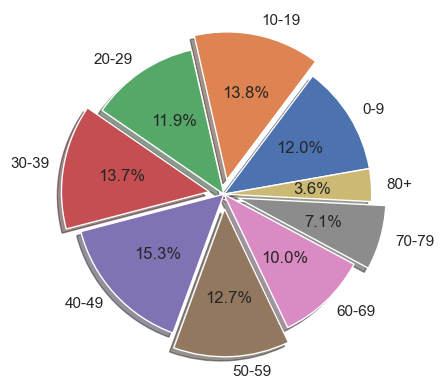

In [692]:
ages=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
Population=[632.4, 728.7,626.3, 721.5,810.4, 670.8, 530.0,372.6,188.9]
explode=(0,0.1,0,0.1,0,0.1,0,0.1,0)
plt.pie(Population,labels=ages, explode=explode, autopct="%1.1f%%", shadow=True, startangle=10)
plt.show()

# #  Annual Population Change since 1950

Review of database

Type of files

Renaming of headers 

In [693]:
AP.head()

,STATISTIC,Year,UNIT,Annual births,Annual deaths,Natural increase,Immigrants,Emigrants,Net migration,Population change,Population
0,Annual Population Change,1951,Thousand,NaN,NaN,26.6,NaN,NaN,-35.0,-8.4,2960.6
1,Annual Population Change,1952,Thousand,NaN,NaN,27.3,NaN,NaN,-35.0,-7.7,2952.9
2,Annual Population Change,1953,Thousand,NaN,NaN,29.1,NaN,NaN,-33.0,-3.9,2949.0
3,Annual Population Change,1954,Thousand,NaN,NaN,28.2,NaN,NaN,-36.0,-7.8,2941.2
4,Annual Population Change,1955,Thousand,NaN,NaN,24.7,NaN,NaN,-45.0,-20.3,2920.9


In [561]:
AP_1=AP.copy()

In [562]:
AP=AP.rename (columns= {'Population change':'Total of the Population change','Population':'Total Population of the year'})
AP= AP.drop(['STATISTIC','UNIT'],axis= 1)

In [563]:
AP

,Year,Annual births,Annual deaths,Natural increase,Immigrants,Emigrants,Net migration,Total of the Population change,Total Population of the year
0,1951,NaN,NaN,26.6,NaN,NaN,-35.0,-8.4,2960.6
1,1952,NaN,NaN,27.3,NaN,NaN,-35.0,-7.7,2952.9
2,1953,NaN,NaN,29.1,NaN,NaN,-33.0,-3.9,2949.0
3,1954,NaN,NaN,28.2,NaN,NaN,-36.0,-7.8,2941.2
4,1955,NaN,NaN,24.7,NaN,NaN,-45.0,-20.3,2920.9
...,...,...,...,...,...,...,...,...,...
68,2019,60.5,30.9,29.6,97.1,53.1,44.0,73.6,4958.5
69,2020,59.1,32.4,26.7,95.6,50.9,44.7,71.4,5029.9
70,2021,57.3,34.3,23.0,74.1,52.3,21.8,44.8,5074.7
71,2022,59.7,33.6,26.1,107.8,56.1,51.7,77.8,5184.0


In [564]:
AP.shape

(73, 9)

In [565]:
AP.isnull().sum()

Year                               0
Annual births                     36
Annual deaths                     36
Natural increase                   0
Immigrants                        36
Emigrants                         36
Net migration                      0
Total of the Population change     0
Total Population of the year       0
dtype: int64

In [566]:
print(AP["Annual births"].isnull().head())

0    True
1    True
2    True
3    True
4    True
Name: Annual births, dtype: bool


In [567]:
AP.notnull()

,Year,Annual births,Annual deaths,Natural increase,Immigrants,Emigrants,Net migration,Total of the Population change,Total Population of the year
0,True,False,False,True,False,False,True,True,True
1,True,False,False,True,False,False,True,True,True
2,True,False,False,True,False,False,True,True,True
3,True,False,False,True,False,False,True,True,True
4,True,False,False,True,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...
68,True,True,True,True,True,True,True,True,True
69,True,True,True,True,True,True,True,True,True
70,True,True,True,True,True,True,True,True,True
71,True,True,True,True,True,True,True,True,True


In [568]:
AP['Annual births'].fillna(int(AP['Annual births'].mean()), inplace=True) 

print(AP['Annual births'].head()) 

0    60.0
1    60.0
2    60.0
3    60.0
4    60.0
Name: Annual births, dtype: float64


In [569]:
AP.isnull().sum()

Year                               0
Annual births                      0
Annual deaths                     36
Natural increase                   0
Immigrants                        36
Emigrants                         36
Net migration                      0
Total of the Population change     0
Total Population of the year       0
dtype: int64

In [570]:
AP['Immigrants'].fillna(int(AP['Immigrants'].mean()), inplace=True) 

In [571]:
AP['Emigrants'].fillna(int(AP['Emigrants'].mean()), inplace=True) 

In [572]:
AP['Annual deaths'].fillna(int(AP['Annual deaths'].mean()), inplace=True) 

In [573]:
AP.isnull().sum()

Year                              0
Annual births                     0
Annual deaths                     0
Natural increase                  0
Immigrants                        0
Emigrants                         0
Net migration                     0
Total of the Population change    0
Total Population of the year      0
dtype: int64

In [574]:
#clase=AP.dropna(axis= "columns") will delete the whole column if any information is missing in any row, on a new file
#clase=AP.dropna(axis= "columns", inplace = True)will delete the entire column if any information is missing in any row, from the original file.
#AP.dropna(axis= 0 , inplace = True)will delete only the columns that have no information in the original file.

AP.dropna(axis= 0 , inplace = True)

In [575]:
AP.dtypes

Year                                int64
Annual births                     float64
Annual deaths                     float64
Natural increase                  float64
Immigrants                        float64
Emigrants                         float64
Net migration                     float64
Total of the Population change    float64
Total Population of the year      float64
dtype: object

In [576]:
AP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            73 non-null     int64  
 1   Annual births                   73 non-null     float64
 2   Annual deaths                   73 non-null     float64
 3   Natural increase                73 non-null     float64
 4   Immigrants                      73 non-null     float64
 5   Emigrants                       73 non-null     float64
 6   Net migration                   73 non-null     float64
 7   Total of the Population change  73 non-null     float64
 8   Total Population of the year    73 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 5.3 KB


In [577]:
AP.count()

Year                              73
Annual births                     73
Annual deaths                     73
Natural increase                  73
Immigrants                        73
Emigrants                         73
Net migration                     73
Total of the Population change    73
Total Population of the year      73
dtype: int64

In [578]:
#First graphs of births and deaths by year 

[Text(0, 0, '1951'),
 Text(1, 0, '1952'),
 Text(2, 0, '1953'),
 Text(3, 0, '1954'),
 Text(4, 0, '1955'),
 Text(5, 0, '1956'),
 Text(6, 0, '1957'),
 Text(7, 0, '1958'),
 Text(8, 0, '1959'),
 Text(9, 0, '1960'),
 Text(10, 0, '1961'),
 Text(11, 0, '1962'),
 Text(12, 0, '1963'),
 Text(13, 0, '1964'),
 Text(14, 0, '1965'),
 Text(15, 0, '1966'),
 Text(16, 0, '1967'),
 Text(17, 0, '1968'),
 Text(18, 0, '1969'),
 Text(19, 0, '1970'),
 Text(20, 0, '1971'),
 Text(21, 0, '1972'),
 Text(22, 0, '1973'),
 Text(23, 0, '1974'),
 Text(24, 0, '1975'),
 Text(25, 0, '1976'),
 Text(26, 0, '1977'),
 Text(27, 0, '1978'),
 Text(28, 0, '1979'),
 Text(29, 0, '1980'),
 Text(30, 0, '1981'),
 Text(31, 0, '1982'),
 Text(32, 0, '1983'),
 Text(33, 0, '1984'),
 Text(34, 0, '1985'),
 Text(35, 0, '1986'),
 Text(36, 0, '1987'),
 Text(37, 0, '1988'),
 Text(38, 0, '1989'),
 Text(39, 0, '1990'),
 Text(40, 0, '1991'),
 Text(41, 0, '1992'),
 Text(42, 0, '1993'),
 Text(43, 0, '1994'),
 Text(44, 0, '1995'),
 Text(45, 0, '1996')

NameError: name 'plot' is not defined

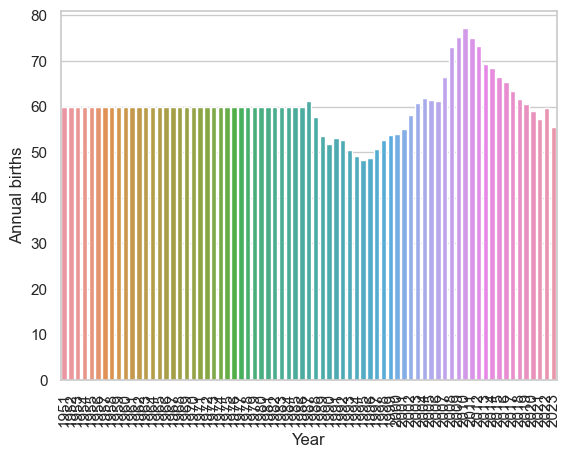

In [579]:
#Annual births
AD = sns.barplot(x='Year', y='Annual births', data=AP)
AD.set_xticklabels(AD.get_xticklabels(), rotation=90)
plot.show()

In [ ]:
#Annual Deaths
values=AP[["Year","Annual births","Annual deaths","Natural increase","Immigrants","Emigrants"]]
ax= values.plot.bar(x="Year", y="Annual deaths")

In [ ]:
#Comparative births and deaths in the same years

In [ ]:
#Barplot
plt.style.use('bmh')
x=AD["Births and deaths"]
y=AD['Year']
#
plt.xlabel("Births and deaths",fontsize=18)
plt.ylabel("Year", fontsize=16)
plt.tittle("Comparative births and deaths in the same years")
plt.bar(x,y)
plt.show()


In [ ]:
AD=sns.barplot(AP['Annual births',AP['Annual deaths']])
plt.show()

In [ ]:
w=
plt.bar(x, Annual deaths,w, label="Annual deaths")
plt.bar(x, Annual births, w,bottom=Annual deaths, label="Annual births" )

plt.xlabel("Births and deaths")
plt.ylabel("Year")
plt.tittle("Comparative births and deaths in the same years")
plt.legend()
plt.show()

In [ ]:
# First graph. Bar chart

In [ ]:
sns.boxplot(x=AP["Annual deaths"])

In [ ]:
plt.hist(AP["Annual deaths"],15, color="green", ec="black")

In [ ]:
# Original graph, extra columns are eliminated and only the totals are left.
AP_1
AP_1.info()

In [ ]:
AP_1 = AP_1.drop(["STATISTIC", "UNIT","Annual births" , "Annual deaths", "Immigrants", "Emigrants"], axis=1)
AP_1.head()

In [ ]:
AP_1.info()

In [ ]:
#Population change
AD = sns.barplot(x='Year', y='Population change', data=AP_1)
AD.set_xticklabels(AD.get_xticklabels(), rotation=100)
plot.show()

# Non-Irish citizens usually resident and present in the State by country of citizenship 2022

With this data my purpose is to visualize the dominant citizenships in Ireland by 2022, which are the main ones and how many people there are according to this statistic.

Observing and describing data

In [694]:
NIC

,Statistic,Census Year,Sex,UNIT,All citizenships,Austria,Belgium,Bulgaria,Croatia,Cyprus,...,Suriname,Central African Republic,Gabon,Equatorial Guinea,Papua New Guinea,Democratic Rep of Congo,Timor-Leste,Myanmar,Korea (the Democratic People's Republic of) North Korea,Rest of the World (1)
0,Non-Irish citizens usually resident and presen...,2022,Both sexes,Number,631785,1079,1581,3994,13649,207,...,1,7,2,7,4,954,55,58,8,17844
1,Non-Irish citizens usually resident and presen...,2022,Male,Number,314707,458,845,2012,7479,110,...,0,4,0,5,2,494,52,33,2,8903
2,Non-Irish citizens usually resident and presen...,2022,Female,Number,317078,621,736,1982,6170,97,...,1,3,2,2,2,460,3,25,6,8941


Strategic objective number one, see data visualization, type of information, number of rows and columns, and database weight

In [695]:
NIC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Columns: 183 entries, Statistic to Rest of the World (1)
dtypes: int64(180), object(3)
memory usage: 4.4+ KB


In [696]:
NIC.shape

(3, 183)

In [697]:
NIC.isnull().sum()

Statistic                                                  0
Census Year                                                0
Sex                                                        0
UNIT                                                       0
All citizenships                                           0
                                                          ..
Democratic Rep of Congo                                    0
Timor-Leste                                                0
Myanmar                                                    0
Korea (the Democratic People's Republic of) North Korea    0
Rest of the World (1)                                      0
Length: 183, dtype: int64

I review my information, I only have nominal information which are the countries and the rest is ordinal, number of people in each country.

In [698]:
NIC.dtypes

Statistic                                                  object
Census Year                                                 int64
Sex                                                        object
UNIT                                                       object
All citizenships                                            int64
                                                            ...  
Democratic Rep of Congo                                     int64
Timor-Leste                                                 int64
Myanmar                                                     int64
Korea (the Democratic People's Republic of) North Korea     int64
Rest of the World (1)                                       int64
Length: 183, dtype: object

Delating columns from the data frame that will not be used for the analysis of this data.

In [699]:
NIC= NIC.drop(columns=['Statistic','Census Year','UNIT','All citizenships'])
NIC.head()

,Sex,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,...,Suriname,Central African Republic,Gabon,Equatorial Guinea,Papua New Guinea,Democratic Rep of Congo,Timor-Leste,Myanmar,Korea (the Democratic People's Republic of) North Korea,Rest of the World (1)
0,Both sexes,1079,1581,3994,13649,207,4530,935,1892,1061,...,1,7,2,7,4,954,55,58,8,17844
1,Male,458,845,2012,7479,110,2226,497,741,339,...,0,4,0,5,2,494,52,33,2,8903
2,Female,621,736,1982,6170,97,2304,438,1151,722,...,1,3,2,2,2,460,3,25,6,8941


Because there are very long column names, I renamed them in order to have fewer characters in the headers and use them as labels for the graphs. 

In [700]:
NIC=NIC.rename (columns= {'United Kingdom of Great Britain and Northern Ireland (the)':'UK','United States of America (the)':'USA','Netherlands (the)':'Netherlands'})
NIC

,Sex,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,...,Suriname,Central African Republic,Gabon,Equatorial Guinea,Papua New Guinea,Democratic Rep of Congo,Timor-Leste,Myanmar,Korea (the Democratic People's Republic of) North Korea,Rest of the World (1)
0,Both sexes,1079,1581,3994,13649,207,4530,935,1892,1061,...,1,7,2,7,4,954,55,58,8,17844
1,Male,458,845,2012,7479,110,2226,497,741,339,...,0,4,0,5,2,494,52,33,2,8903
2,Female,621,736,1982,6170,97,2304,438,1151,722,...,1,3,2,2,2,460,3,25,6,8941


I have 3 rows and 179 columns, which indicates that I have 179 nationalities in this database, I must determine some strategy to eliminate some nationalities and to be able to plot them in a way that I can better appreciate the most predominant countries in Ireland. 

In [701]:
NIC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Columns: 179 entries, Sex to Rest of the World (1)
dtypes: int64(178), object(1)
memory usage: 4.3+ KB


In [702]:
NIC.shape

(3, 179)

I check that my information is not dirty and I have all the information, I have no missing information.

In [703]:
NIC.notnull()

,Sex,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,...,Suriname,Central African Republic,Gabon,Equatorial Guinea,Papua New Guinea,Democratic Rep of Congo,Timor-Leste,Myanmar,Korea (the Democratic People's Republic of) North Korea,Rest of the World (1)
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


I create a copy since in my base I have, both sexes, male and female, in this first analysis I would like to work with the totals of each nationality (both sexes) and then see the analysis of male and female of each nationality.

In [704]:
NIC_1=NIC.copy()

In [705]:
NIC = NIC.drop(NIC.index[[1,2]],
               axis=0)
NIC.head()

,Sex,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,...,Suriname,Central African Republic,Gabon,Equatorial Guinea,Papua New Guinea,Democratic Rep of Congo,Timor-Leste,Myanmar,Korea (the Democratic People's Republic of) North Korea,Rest of the World (1)
0,Both sexes,1079,1581,3994,13649,207,4530,935,1892,1061,...,1,7,2,7,4,954,55,58,8,17844


In order to better manipulate my data I will transpose my rows but as seen in class in this first analysis I will use the .melt function to do so.

In [706]:
NIC_2=NIC.melt(var_name="city",value_name="Number of migrants")
NIC_2

,city,Number of migrants
0,Sex,Both sexes
1,Austria,1079
2,Belgium,1581
3,Bulgaria,3994
4,Croatia,13649
...,...,...
174,Democratic Rep of Congo,954
175,Timor-Leste,55
176,Myanmar,58
177,Korea (the Democratic People's Republic of) No...,8


In [707]:
NIC_2 = NIC_2.drop(NIC_2.index[[0]],
               axis=0)
NIC_2.head()

,city,Number of migrants
1,Austria,1079
2,Belgium,1581
3,Bulgaria,3994
4,Croatia,13649
5,Cyprus,207


I have a total of 631785 that I got thanks to the .sum function, this tells me that I have 631785 people of other non-Irish nationalities in 2022 in the country.

In [708]:
Total=NIC_2.sum()
Total

city                  AustriaBelgiumBulgariaCroatiaCyprusCzechiaDenm...
Number of migrants                                               631785
dtype: object

For a better visualization I order from highest to lowest as a query and then I change it in the base to be able to work with that filtered information. 

In [709]:
print(NIC_2.sort_values(by=['Number of migrants'],ascending=[False]))

                 city Number of migrants
20             Poland              93680
27                 UK              83347
95              India              45449
22            Romania              43323
16          Lithuania              31177
..                ...                ...
130      Turkmenistan                  5
173  Papua New Guinea                  4
129        Tajikistan                  4
171             Gabon                  2
169          Suriname                  1

[178 rows x 2 columns]


In [710]:
NIC_2.sort_values(by=['Number of migrants'],ascending=[False],inplace=True)

In [711]:
NIC_2.head()

,city,Number of migrants
20,Poland,93680
27,UK,83347
95,India,45449
22,Romania,43323
16,Lithuania,31177


In [712]:
NIC_2.city

20               Poland
27                   UK
95                India
22              Romania
16            Lithuania
             ...       
130        Turkmenistan
173    Papua New Guinea
129          Tajikistan
171               Gabon
169            Suriname
Name: city, Length: 178, dtype: object

In [713]:
NIC_2.info

<bound method DataFrame.info of                  city Number of migrants
20             Poland              93680
27                 UK              83347
95              India              45449
22            Romania              43323
16          Lithuania              31177
..                ...                ...
130      Turkmenistan                  5
173  Papua New Guinea                  4
129        Tajikistan                  4
171             Gabon                  2
169          Suriname                  1

[178 rows x 2 columns]>

To filter the nationalities with greater presence in the country, I wanted to work with those with greater volume, so I consulted the mean of 3549.35

In [714]:
NIC_2['Number of migrants'].mean()

3549.35393258427

As well as the maximum, which indicates that the nationality with the most people in Ireland is of 93680

In [715]:
NIC_2['Number of migrants'].max()

93680

And the minimum, which indicates that there is only one person in Ireland from that country on my base. 

In [716]:
NIC_2['Number of migrants'].min()

1

In order to be able to extract the nationalities with the highest volume, I consult which ones are higher than the average of 3549.36,which indicates to me that of the 178 only 26 are above average 

In [717]:
first_26= NIC_2[NIC_2['Number of migrants']>3549.36]
first_26.head()

,city,Number of migrants
20,Poland,93680
27,UK,83347
95,India,45449
22,Romania,43323
16,Lithuania,31177


In [718]:
first_26.shape

(26, 2)

And I do the same to see which are better than the average, which as a difference of 178-26 the result is 152.

In [719]:
rest= NIC_2[NIC_2['Number of migrants']<3549.36]
rest.head()

,city,Number of migrants
136,Canada,3528
165,Australia,3481
101,Malaysia,3407
110,Syrian Arab Republic (the),3267
31,Moldova (the Republic of),3119


In [720]:
rest.shape

(152, 2)

In order to be able to graph and not lose any information I would like to add another row with the totals of the countries below the average so I consult the .sum of those countries. 

In [721]:
rest.sum()

city                  CanadaAustraliaMalaysiaSyrian Arab Republic (t...
Number of migrants                                                84600
dtype: object

In [722]:
rest_total=rest['Number of migrants'].sum()
rest_total

84600

In [723]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 136 to 169
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   city                152 non-null    object
 1   Number of migrants  152 non-null    object
dtypes: object(2)
memory usage: 3.6+ KB


In my list of the first 26 (most predominant nationalities) there is one with the title 'Rest of the World(1)' that includes other nationalities that were not included in the base (in addition to the first 178).

I will eliminate that row to add it with the previous total of the countries below the average and be able to integrate a new row with the final total to be able to graph

In [724]:
first_26

,city,Number of migrants
20,Poland,93680
27,UK,83347
95,India,45449
22,Romania,43323
16,Lithuania,31177
135,Brazil,27338
14,Italy,18319
15,Latvia,18300
25,Spain,17953
178,Rest of the World (1),17844


In [725]:
Rest_of_the_World=17844
Rest_of_the_World

17844

In [726]:
first_26 = first_26.drop(first_26.index[[9]],
               axis=0)
first_26.head()

,city,Number of migrants
20,Poland,93680
27,UK,83347
95,India,45449
22,Romania,43323
16,Lithuania,31177


As an additional procedure, just to confirm that the information is correct, I will perform a mathematical operation.

According to official data (bases analyzed previously), the 2022 population was 5184 (Thousand)  of which the non-Irish population was 631785.

In [727]:
Population_2022

5184

In [728]:
#Total of migrants in 2022 (631785)

The total base of nationalities with the greatest presence 'first_26' is 529341

In [729]:
first_26['Number of migrants'].sum()

529341

In [730]:
first_26.sum()

city                  PolandUKIndiaRomaniaLithuaniaBrazilItalyLatvia...
Number of migrants                                               529341
dtype: object

In [731]:
first_26_total=first_26['Number of migrants'].sum()
first_26_total

529341

Therefore, according to the saved data, I verify that the information is correct since I check if
Total==first_26_total+rest_total+Rest_of_the_World

Total = Non-Irish citizens usually resident total  in 2022

first_26= Nationalized with greater presence

rest_total= nationalidas (152) below the average

Rest_of_the_World= Additional nationalities that were not included in the original database

In [732]:
Total==first_26_total+rest_total+Rest_of_the_World

city                  False
Number of migrants     True
dtype: bool

In [733]:
Total

city                  AustriaBelgiumBulgariaCroatiaCyprusCzechiaDenm...
Number of migrants                                               631785
dtype: object

I will integrate an additional row to my df of first_26 with the remaining countries that have quantities less than the average

In [734]:
rest_total+Rest_of_the_World

102444

In [735]:
Rest_countries={"city": "Rest of the World","Number of migrants":102444}

first_26 = first_26.append( Rest_countries, ignore_index=True)

first_26

,city,Number of migrants
0,Poland,93680
1,UK,83347
2,India,45449
3,Romania,43323
4,Lithuania,31177
5,Brazil,27338
6,Italy,18319
7,Latvia,18300
8,Spain,17953
9,France,13893


In [736]:
first_26.sort_values(by=['Number of migrants'],ascending=[False],inplace=True)
first_26

,city,Number of migrants
25,Rest of the World,102444
0,Poland,93680
1,UK,83347
2,India,45449
3,Romania,43323
4,Lithuania,31177
5,Brazil,27338
6,Italy,18319
7,Latvia,18300
8,Spain,17953


Now that I have the final data, I would like to visualize it better with a bar chart since I want to compare the number of people from each country in Ireland. 

In [737]:
#Bar graph. Matplotlib

In [738]:
x = first_26['city']
y = first_26['Number of migrants']

Text(0.5, 0, 'CITY')

Text(0, 0.5, 'NUMBER OF MIGRANTS')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

<BarContainer object of 26 artists>

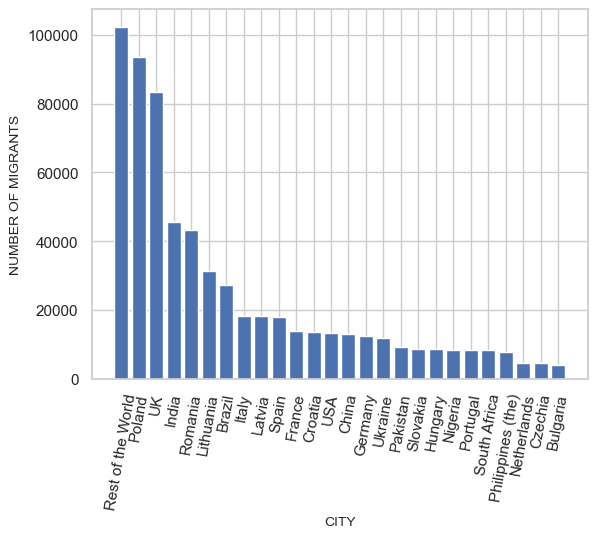

In [739]:
plt.xlabel('CITY',fontsize=10)
plt.ylabel('NUMBER OF MIGRANTS',fontsize=10)
plt.xticks(rotation=80)

plt.bar(x,y)

In [740]:
#Bar graph. Seaborn

[Text(0, 0, 'Rest of the World'),
 Text(1, 0, 'Poland'),
 Text(2, 0, 'UK'),
 Text(3, 0, 'India'),
 Text(4, 0, 'Romania'),
 Text(5, 0, 'Lithuania'),
 Text(6, 0, 'Brazil'),
 Text(7, 0, 'Italy'),
 Text(8, 0, 'Latvia'),
 Text(9, 0, 'Spain'),
 Text(10, 0, 'France'),
 Text(11, 0, 'Croatia'),
 Text(12, 0, 'USA'),
 Text(13, 0, 'China'),
 Text(14, 0, 'Germany'),
 Text(15, 0, 'Ukraine'),
 Text(16, 0, 'Pakistan'),
 Text(17, 0, 'Slovakia'),
 Text(18, 0, 'Hungary'),
 Text(19, 0, 'Nigeria'),
 Text(20, 0, 'Portugal'),
 Text(21, 0, 'South Africa'),
 Text(22, 0, 'Philippines (the)'),
 Text(23, 0, 'Netherlands'),
 Text(24, 0, 'Czechia'),
 Text(25, 0, 'Bulgaria')]

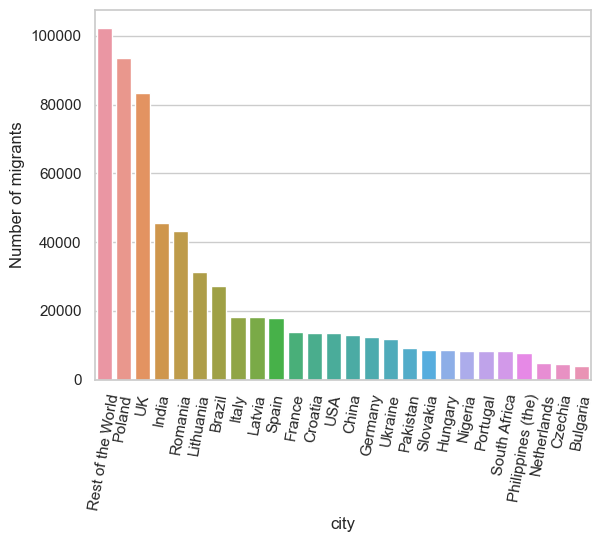

In [741]:
ax = sns.barplot(x='city', y='Number of migrants', data=first_26) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)

A dot plot to see the relationship between each nationality. 

In [742]:
#Matplotlib

Text(0.5, 0, 'CITY')

Text(0, 0.5, 'NUMBER OF MIGRANTS')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

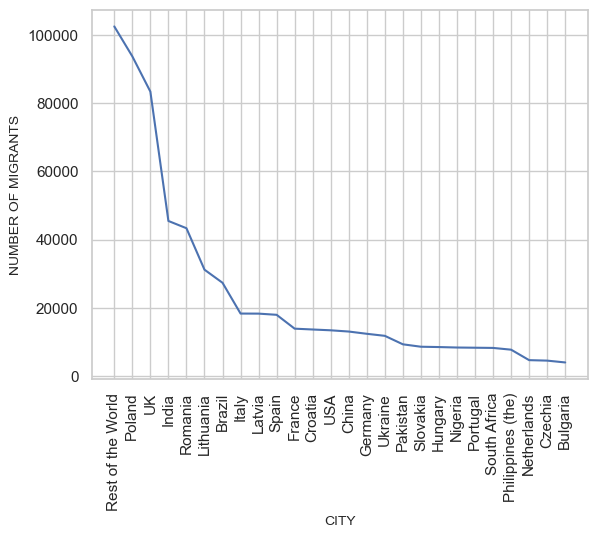

In [743]:
plt.xlabel('CITY',fontsize=10)
plt.ylabel('NUMBER OF MIGRANTS',fontsize=10)
plt.xticks(rotation=90)
plt.plot(x,y)

Scatterplot to see again the relationship between nationalities 

In [744]:
#Matplotlib

Text(0.5, 0, 'CITY')

Text(0, 0.5, 'NUMBER OF MIGRANTS')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

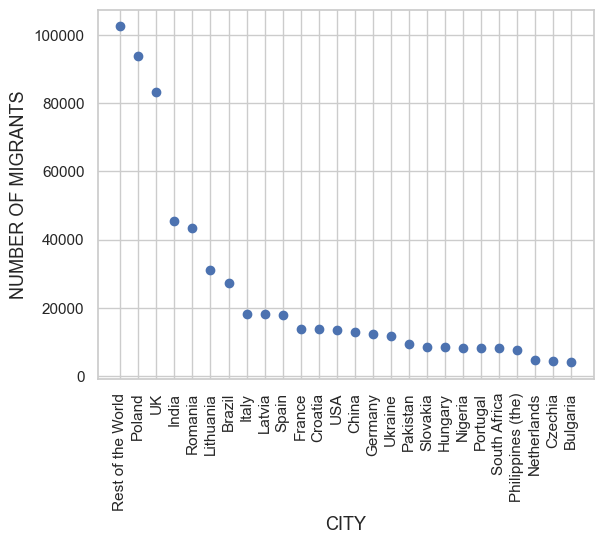

In [745]:
plt.xlabel('CITY',fontsize=13)
plt.ylabel('NUMBER OF MIGRANTS',fontsize=13)
plt.xticks(rotation=90)
plt.scatter(x,y)

In [746]:
#Seaborn

<Axes: xlabel='city', ylabel='Number of migrants'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, 'Rest of the World'),
  Text(1, 0, 'Poland'),
  Text(2, 0, 'UK'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Romania'),
  Text(5, 0, 'Lithuania'),
  Text(6, 0, 'Brazil'),
  Text(7, 0, 'Italy'),
  Text(8, 0, 'Latvia'),
  Text(9, 0, 'Spain'),
  Text(10, 0, 'France'),
  Text(11, 0, 'Croatia'),
  Text(12, 0, 'USA'),
  Text(13, 0, 'China'),
  Text(14, 0, 'Germany'),
  Text(15, 0, 'Ukraine'),
  Text(16, 0, 'Pakistan'),
  Text(17, 0, 'Slovakia'),
  Text(18, 0, 'Hungary'),
  Text(19, 0, 'Nigeria'),
  Text(20, 0, 'Portugal'),
  Text(21, 0, 'South Africa'),
  Text(22, 0, 'Philippines (the)'),
  Text(23, 0, 'Netherlands'),
  Text(24, 0, 'Czechia'),
  Text(25, 0, 'Bulgaria')])

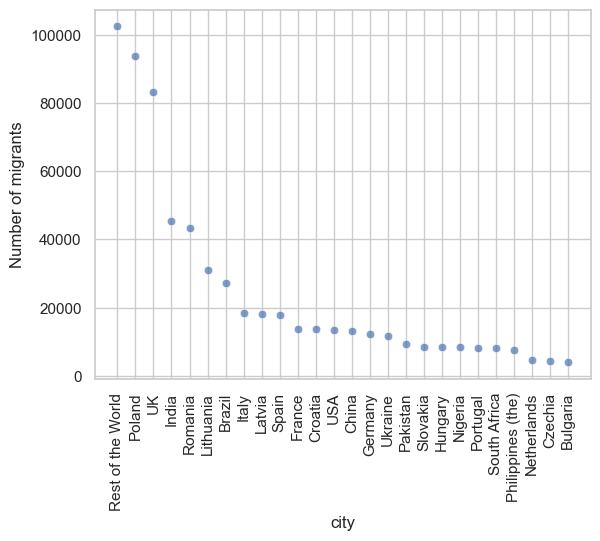

In [747]:
sns.scatterplot(data=first_26, x='city', y='Number of migrants', alpha=0.7); 
plt.xticks(rotation=90)

Added two additional columns to see what percentage each nationality represents of the total population of 2022, considering that according to statistics the total population (Irish and non-Irish) was 5,184,000 people.

#total population of 2022 = 5 184 000 people

#2022=5 184 000

#Non-Irish citizens usually resident and present in the State = 631 785
#Non-Irish citizens usually resident and present in the State = Total

#Percentage of total population 2022 = %Pupulation2022

#Percentage=((('Number of migrants')/5184000)*100)

In [638]:
Population_2022

5184

In [639]:
first_26['Population2022'] = first_26['Number of migrants']/5184000
                      
first_26.head()

,city,Number of migrants,Population2022
25,Rest of the World,102444,0.019762
0,Poland,93680,0.018071
1,UK,83347,0.016078
2,India,45449,0.008767
3,Romania,43323,0.008357


In [640]:
first_26['%Population2022'] = first_26['Population2022']*100
first_26.head()

,city,Number of migrants,Population2022,%Population2022
25,Rest of the World,102444,0.019762,1.976157
0,Poland,93680,0.018071,1.807099
1,UK,83347,0.016078,1.607774
2,India,45449,0.008767,0.876717
3,Romania,43323,0.008357,0.835706


In [485]:
first_26.sort_values(by=['Number of migrants'],ascending=[False],inplace=True)
first_26

,city,Number of migrants,Population2022,%Population2022
0,Rest of the World,102444,0.019762,1.976157
26,Rest of the World,102444,0.019762,1.976157
1,Poland,93680,0.018071,1.807099
2,UK,83347,0.016078,1.607774
3,India,45449,0.008767,0.876717
4,Romania,43323,0.008357,0.835706
5,Lithuania,31177,0.006014,0.601408
6,Brazil,27338,0.005274,0.527353
7,Italy,18319,0.003534,0.353376
8,Latvia,18300,0.00353,0.353009
